In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df=pd.read_csv("/content/twitter_validation.csv",header=None,encoding='ISO-8859-1')   #to read special character and emojis encoding is used

In [ ]:
df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.columns=['ID','Social_media','target','review']

In [ ]:
df

,ID,Social_media,target,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,ID,Social_media,target,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,ID,Social_media,target,review
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.dtypes

ID               int64
Social_media    object
target          object
review          object
dtype: object

In [ ]:
df.isna().sum()

ID              0
Social_media    0
target          0
review          0
dtype: int64

In [ ]:
target_count=df["target"].value_counts()
sm_count=df["Social_media"].value_counts()
target_count

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

In [ ]:
sm_count

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


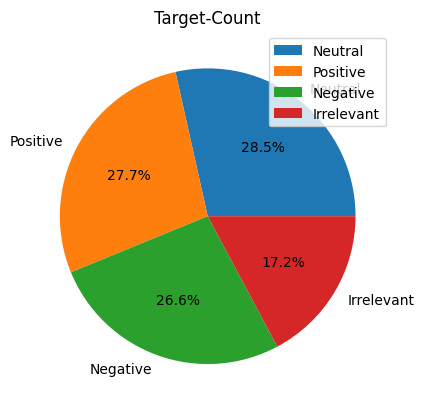

In [ ]:
plt.pie(x=target_count.values,labels=target_count.index,autopct="%1.1f%%")
plt.title("Target-Count")
plt.legend()

<Axes: xlabel='target', ylabel='count'>

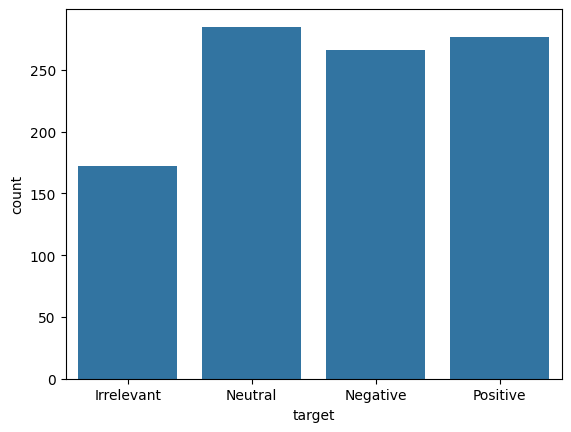

In [ ]:
sns.countplot(x="target",data=df)

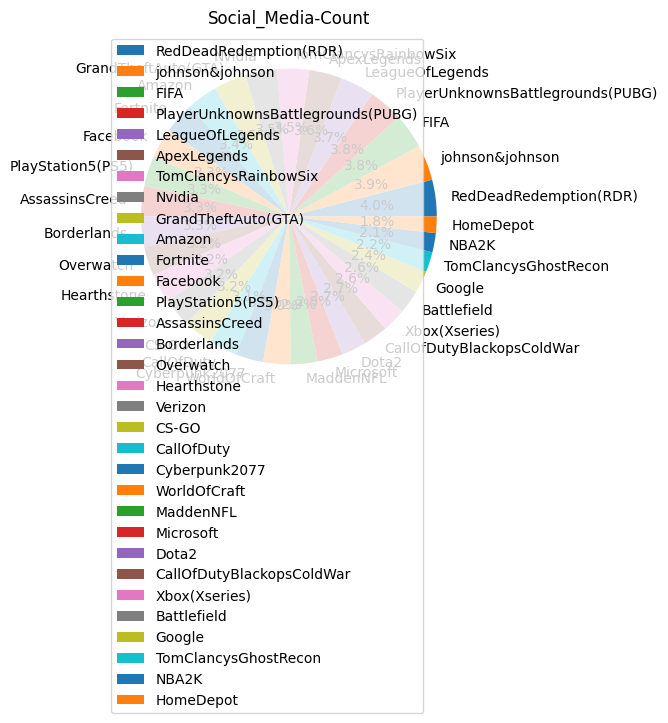

In [ ]:
plt.pie(x=sm_count.values,labels=sm_count.index,autopct="%1.1f%%")
plt.title("Social_Media-Count")
plt.legend()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Amazon'),
  Text(2, 0, 'Microsoft'),
  Text(3, 0, 'CS-GO'),
  Text(4, 0, 'Google'),
  Text(5, 0, 'FIFA'),
  Text(6, 0, 'MaddenNFL'),
  Text(7, 0, 'TomClancysRainbowSix'),
  Text(8, 0, 'AssassinsCreed'),
  Text(9, 0, 'CallOfDuty'),
  Text(10, 0, 'Dota2'),
  Text(11, 0, 'Verizon'),
  Text(12, 0, 'NBA2K'),
  Text(13, 0, 'Nvidia'),
  Text(14, 0, 'GrandTheftAuto(GTA)'),
  Text(15, 0, 'RedDeadRedemption(RDR)'),
  Text(16, 0, 'Hearthstone'),
  Text(17, 0, 'ApexLegends'),
  Text(18, 0, 'Overwatch'),
  Text(19, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
  Text(20, 0, 'Borderlands'),
  Text(21, 0, 'PlayStation5(PS5)'),
  Text(22, 0, 'johnson&johnson'),
  Text(23, 0, 'Fortnite'),
  Text(24, 0, 'Xbox(Xseries)'),
  Text(25, 0, 'CallOfDutyBlackopsColdWar'),
  Text(26, 0, 'HomeDepot'

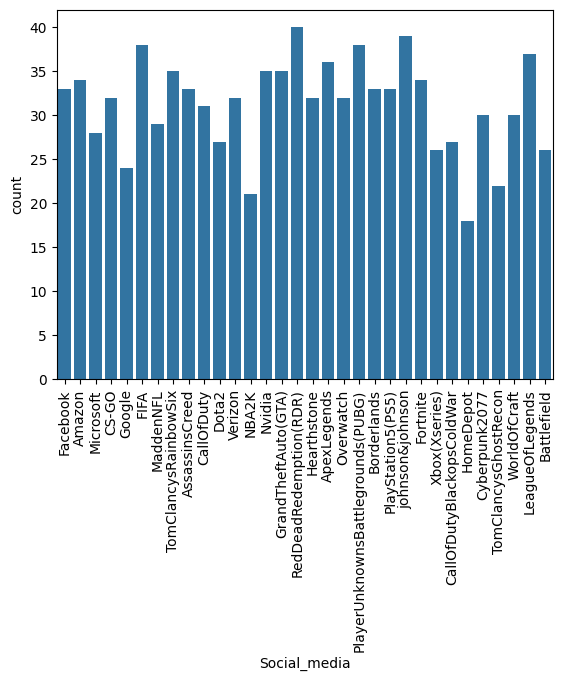

In [ ]:
sns.countplot(x="Social_media",data=df)
plt.xticks(rotation=90)

In [ ]:
df1=df.loc[df["target"]!="Irrelevant"]
df1['target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df1

,ID,Social_media,target,review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
df1

,ID,Social_media,target,review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.drop(["ID",'Social_media'],axis=1,inplace=True)


<ipython-input-298-cad4fa3354e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["ID",'Social_media'],axis=1,inplace=True)


In [ ]:
df1

,target,review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#change values of target by
#positive : 1
#negative : -1
#neutral  : 0

# df1["target"]=df1["target"].str.replace("Positive","1")
# df1["target"]=df1["target"].str.replace("Negative","-1")
# df1["target"]=df1["target"].str.replace("Neutral","0")

In [ ]:
df1['target']=df1['target'].map({'Positive':1,'Neutral':0,'Negative':-1})

<ipython-input-301-bc79668db325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target']=df1['target'].map({'Positive':1,'Neutral':0,'Negative':-1})


In [ ]:
df1

,target,review
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.dtypes

target     int64
review    object
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweet=df1.review
tweet


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: review, Length: 828, dtype: object

In [ ]:
#tokanization
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: review, Length: 828, dtype: object

In [ ]:
#removing special_charachetrs
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')  #TO delete combination of special charachter + is used
tweet

<ipython-input-307-a3998a9a6fac>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')  #TO delete combination of special charachter + is used


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: review, Length: 828, dtype: object

In [ ]:
# a word is said to be meaningful if length greater than 3
from nltk.tokenize import word_tokenize
tweet=tweet.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweet

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: review, Length: 828, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: review, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: review, Length: 828, dtype: object

In [ ]:
#vectorization
#TF-ID
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweet)


In [ ]:
train_data.shape  #there are 3783 unique words that expand into 3783 columns

(828, 3783)

In [ ]:
print(train_data)

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [ ]:
x=train_data

In [ ]:
y=df1['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
# k_model=KNeighborsClassifier()
# yk_predict=k_model.predict(x_test)
# print(accuracy_score(y_test,yk_pred))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
k_model=KNeighborsClassifier()
n_model=MultinomialNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
lst_model=[k_model,n_model,s_model,d_model]

In [ ]:
for i in lst_model:
  print("Model name is: ",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("***********************")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score.............")
  print(accuracy_score(y_test,y_pred))

Model name is:  KNeighborsClassifier()
***********************
[[64 10  5]
 [48 22  9]
 [52 14 25]]
Accuracy score.............
0.4457831325301205
Model name is:  MultinomialNB()
***********************
[[43 27  9]
 [14 43 22]
 [15 22 54]]
Accuracy score.............
0.5622489959839357
Model name is:  SVC()
***********************
[[41 34  4]
 [ 9 60 10]
 [11 36 44]]
Accuracy score.............
0.5823293172690763
Model name is:  DecisionTreeClassifier(criterion='entropy')
***********************
[[43 20 16]
 [32 26 21]
 [36 20 35]]
Accuracy score.............
0.41767068273092367
